In [1]:
%%bash
nrnivmodl

/usr/bin/xcrun
/Users/anatolii-sorokin/Documents/Projects/neuro-trafic
Mod files: "./h.mod" "./kadist.mod" "./kaprox.mod" "./kdrca1.mod" "./km.mod" "./na3n.mod" "./naxn.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.dylib
Successfully created arm64/special


In [2]:
# Download NEURON: http://www.neuron.yale.edu/neuron/download
# Download PyNeuronToolbox: https://github.com/ahwillia/PyNeuron-Toolbox

from neuron import h
import numpy as np
import pylab as plt
import scipy.linalg
from PyNeuronToolbox.record import ez_record,ez_convert
from PyNeuronToolbox.morphology import shapeplot,shapeplot_animate
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
from matplotlib import animation
from matplotlib.pyplot import cm
%matplotlib inline
np.random.seed(123456789)

# Load morphology and other stuff
# --> SegLists: soma[2], dend[74], dend_5[37], apic[42], axon[1]
# --> Files from Migliore & Migliore (2012)
# --> CA1 pyramidal neuron
h.load_file('stdrun.hoc')
h.xopen('ri06.hoc')
h.xopen('fixnseg.hoc')
h.xopen('5a_nogui.hoc')
h.tstop = 700.0

	0 
total # of segments (50Hz): 742   max path distance: 853.32493 
apical 0  dend_5[0]
apical 1  dend_5[15]
apical 2  dend_5[14]
apical 3  dend_5[13]
apical 4  dend_5[12]
apical 5  dend_5[12]
apical 6  dend_5[12]
apical 7  dend_5[12]
apical 8  dend_5[12]
apical 9  dend_5[12]
apical 10  dend_5[12]
apical 11  dend_5[11]
apical 12  dend_5[11]
apical 13  dend_5[11]
apical 14  dend_5[10]
apical 15  dend_5[9]
apical 16  dend_5[8]
apical 17  dend_5[8]
apical 18  dend_5[8]
apical 19  dend_5[7]
apical 20  dend_5[6]
apical 21  dend_5[5]
apical 22  dend_5[5]
apical 23  dend_5[5]
apical 24  dend_5[5]
apical 25  dend_5[5]
apical 26  dend_5[5]
apical 27  dend_5[5]
apical 28  dend_5[4]
apical 29  dend_5[4]
apical 30  dend_5[4]
apical 31  dend_5[3]
apical 32  dend_5[2]
apical 33  dend_5[2]
apical 34  dend_5[2]
apical 35  dend_5[2]
apical 36  dend_5[2]
apical 37  dend_5[2]
apical 38  dend_5[2]
apical 39  dend_5[1]
apical 40  dend_5[1]
apical 41  dend_5[1]
#1


In [3]:
from PyNeuronToolbox.morphology import dist_between,allsec_preorder

def dist_to_soma(segment):
    return dist_between(h,h.soma[0](0.5),segment)

#seglist in pre-order
sec_list = allsec_preorder(h)
seg_list = []
for sec in sec_list:
    locs = np.linspace(0,1,sec.nseg+2)[1:-1]
    for loc in locs:
        seg_list.append(sec(loc))
n = len(seg_list)

In [4]:
secL=np.zeros(len(sec_list))
secD=np.zeros(len(sec_list))
segL=np.zeros(len(sec_list))
for i in range(len(sec_list)):
    sec = sec_list[i]
    secL[i]=sec.L
    secD[i]=sec.diam
    segL[i]=sec.L/sec.nseg
    print(f"{i}: {sec.name()}, nseg={sec.nseg}, L={sec.L}, D={sec.diam}, l={sec.L/sec.nseg}, or={sec.orientation()}, hname={sec.hname()}")
segA=h.PI*secD*segL
segV=h.PI*secD**2*segL/4


0: soma[0], nseg=1, L=15.166100084781647, D=8.62367892888686, l=15.166100084781647, or=0.0, hname=soma[0]
1: soma[1], nseg=1, L=10.883900105953217, D=11.361924139195267, l=10.883900105953217, or=0.0, hname=soma[1]
2: dend_5[0], nseg=1, L=27.29313676464808, D=3.83238905561517, l=27.29313676464808, or=0.0, hname=dend_5[0]
3: apic[0], nseg=9, L=147.93433051396065, D=0.4742140263236419, l=16.437147834884517, or=0.0, hname=apic[0]
4: dend_5[1], nseg=3, L=57.45149110486393, D=3.7999999523162846, l=19.150497034954643, or=0.0, hname=dend_5[1]
5: apic[39], nseg=1, L=23.29171407802628, D=1.0911011688569283, l=23.29171407802628, or=0.0, hname=apic[39]
6: apic[41], nseg=3, L=34.922839435595144, D=0.479999989271164, l=11.640946478531715, or=0.0, hname=apic[41]
7: apic[40], nseg=5, L=52.39168693889804, D=0.47999998927116383, l=10.478337387779607, or=0.0, hname=apic[40]
8: dend_5[2], nseg=1, L=21.183727600433784, D=3.67421469495641, l=21.183727600433784, or=0.0, hname=dend_5[2]
9: apic[32], nseg=1, L

In [6]:
(min(segL),max(segL),min(secD),max(secD))

(5.101919101126361, 34.51966821983582, 0.3899999856948851, 11.361924139195267)

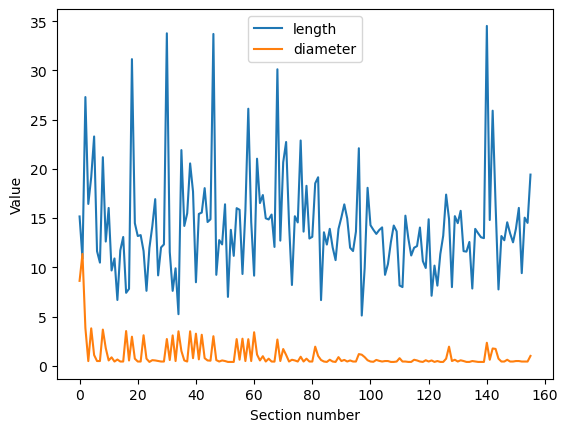

In [7]:
x=np.array(range(len(sec_list)),dtype=int)
plt.plot(x,segL,label='length')
plt.plot(x,secD,label='diameter')
#plt.plot(x,segA,label='area')
#plt.plot(x,segV,label='volume')
plt.ylabel('Value')
plt.xlabel('Section number')
# show a legend on the plot
plt.legend()
plt.show()

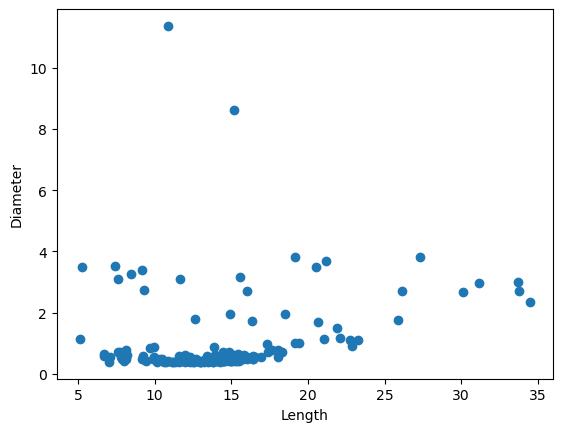

In [8]:
plt.scatter(segL,secD)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()

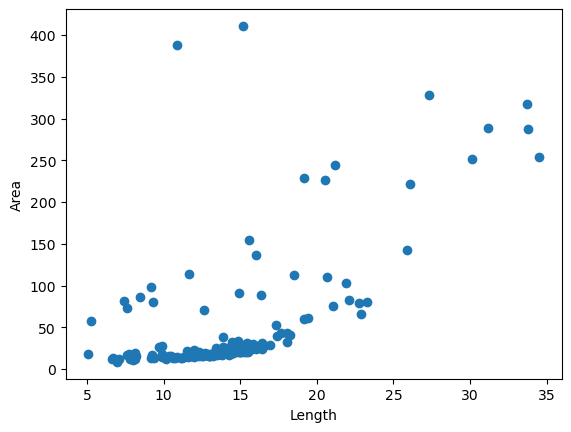

In [9]:
plt.scatter(segL,segA)
plt.xlabel('Length')
plt.ylabel('Area')
plt.show()

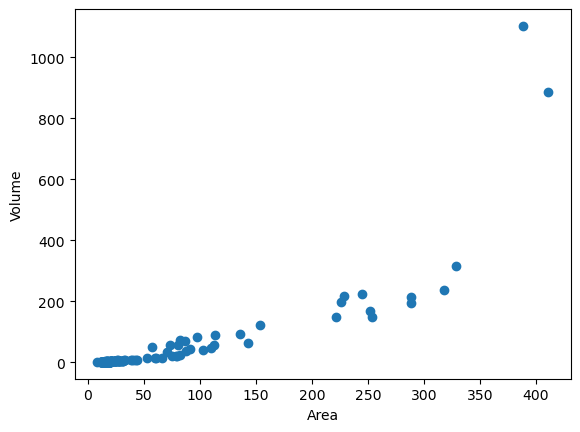

In [10]:
plt.scatter(segA,segV)
plt.xlabel('Area')
plt.ylabel('Volume')
plt.show()

In [ ]:
(dist_to_soma(sec(0)),dist_to_soma(sec(1)),sec.L,np.linspace(0,1,sec.nseg+2),np.linspace(0,1,sec.nseg+2)[1:-1])

In [ ]:
dts = [dist_to_soma(s) for s in seg_list]
dts[:11]

In [ ]:
import re
import pandas as pd
p = re.compile("^([^\\[]+)\\[.+")
tps = [p.sub("\\1",seg.sec.name()) for seg in seg_list]
pd.Series(tps).drop_duplicates().tolist()

In [ ]:
seg = seg_list[0]
(seg.node_index(),seg.x,seg.sec)

In [ ]:
(n,min(dts),max(dts))

In [ ]:
def sushi_system(a,b,c,d):
    """
    Returns a matrix A, such that dx/dt = A*x
    
    N = # of compartments
    A is (2N x 2N) matrix
    x is (2N x 1) vector.
      The first N elements correspond to concentrations of u (molecules in transit)
      The second half correspond to concentrations of u-star (active molecules)
    The trafficking rate constants along the microtubules are given by the vectors "a" and "b"
    The rate constants for u turning into u* is given by the vector "c"
    The rate constants for the degradation of u* is given by the vector "d"
    """
    # number of compartments
    N = len(d)
    
    ## State-space equations
    #  dx/dt = Ax + Bu
    A = np.zeros((2*N,2*N))

    # Trafficking along belt
    # Iterative traversal of dendritic tree in pre-order
    i = 0
    section = None
    parentStack = [(None,h.soma[0])]
    while len(parentStack)>0:
        # Get next section to traverse
        #  --> p is parent index, section is h.Section object
        (p,section) = parentStack.pop()
        
        # Trafficking to/from parent
        if p is not None:
            # Out of parent, into child
            ai = a.pop()
            A[p,p] += -ai
            A[i,p] += ai
            # Into parent, out of child
            bi = b.pop()
            A[p,i] += bi
            A[i,i] += -bi
        
        # visit all segments in compartment
        for (j,seg) in enumerate(section):
            # Deal with out/into rates within compartment, just tridiag matrix
            if j>0:
                # Out of parent, into child
                ai = a.pop()
                A[i-1,i-1] += -ai
                A[i,i-1] += ai
                # Into parent, out of child
                bi = b.pop()
                A[i-1,i] += bi
                A[i,i] += -bi
            # move onto next compartment
            i += 1
        
        # now visit children in pre-order
        child_list = list(h.SectionRef(sec=section).child)
        if child_list is not None:
            child_list.reverse()
        for c_sec in child_list:
            parentStack.append([i-1,c_sec]) # append parent index and child
    
    # Trafficking off the belt
    for i in range(N):
        A[i,i] += -c[i]
        A[i+N,i] += c[i]

    # Degradation after being taken off the belt
    for i in range(N):
        A[i+N,i+N] = -d[i]
    
    return A

In [ ]:
def trafficking_solution(utarg):
    """ Solve the problem by tuning trafficking rates, like Figs 1 and 2. """
    x = []
    
    # Iterative traversal of dendritic tree in pre-order
    i = 0
    section = None
    parentStack = [(None,h.soma[0])]
    while len(parentStack)>0:
        # Get next section to traverse
        #  --> p is parent index, section is h.Section object
        (p,section) = parentStack.pop()
        
        # Trafficking to/from parent
        if p is not None:
            mp = utarg[p] # concentration in parent
            mc = utarg[i] # concentration in child
            x.insert(0,mp/mc)
        
        # visit all segments in compartment
        for (j,seg) in enumerate(section):
            # Deal with out/into rates within compartment, just tridiag matrix
            if j>0:
                mp = utarg[i-1]
                mc = utarg[i]
                x.insert(0,mp/mc)
                
            # move onto next compartment
            i += 1
        
        # now visit children in pre-order
        child_list = list(h.SectionRef(sec=section).child)
        if child_list is not None:
            child_list.reverse()
        for c_sec in child_list:
            parentStack.append([i-1,c_sec]) # append parent index and child
    
    # return calculated guesses (flip, up/down since get_deriv pops from start)
    return np.array(x)

def get_sys_matrix(utarg,F=0.5,Ctau=1e-3,dv=1e-7):
    # F is a mixing factor between 0 and 1
    K = np.sum(utarg)/n
    x = trafficking_solution(F*utarg + (1-F)*K)
    a = (1/(1+x))
    a = list(a)
    b = list((1/(1+x**-1)))
    d = list(np.ones(n)*dv)
    c = list(Ctau*utarg/(F*utarg + (1-F)*K))
    A = sushi_system(a,b,c,d)
    return A

In [ ]:
# matrix exponential used to solve linear system
from scipy.linalg import expm

# initial condition, u starts only in soma and is trafficked out to dendrites
u0 = np.zeros(2*n)
u0[0] = 1.0  # compartment 0 is the soma

In [ ]:
utarg = np.ones(len(seg_list))
utarg[260:393] *= 10
utarg[393:] *= 0.1 # no trafficking to basal dend
utarg /= np.sum(utarg)
F=0.5
Ctau=1e-3
dv=1e-7
K = np.sum(utarg)/n
x = trafficking_solution(F*utarg + (1-F)*K)
a = (1/(1+x))
a = list(a)
b = list((1/(1+x**-1)))
d = list(np.ones(n)*dv)
c = list(Ctau*utarg/(F*utarg + (1-F)*K))
A = sushi_system(a,b,c,d)
(x.shape, A.shape[0]/2)

In [ ]:
N = len(d)
An = np.zeros((2*N,2*N))
(N, len(a),len(b),len(c),An.shape,x.shape, (1/(1+x)).shape)

In [ ]:
a = (1/(1+x))
a = list(a)
aZ = []
(len(a),a.pop(),len(a),a.pop())

In [ ]:
def solve_u(w,V,Vinv,t):
    D = np.diag(np.exp(w*t))          # diagonal matrix exponential
    PHI = np.real(V.dot(D.dot(Vinv))) # state transition matrix
    return PHI.dot(u0)                # calculate u(t)

def run_sim(A,nframes=10):
    # Run a simulation (log time)
    # --> this is a linear system; thus, matrix exponential provides exact solution
    utrace = [u0]
    t = np.logspace(-0.5,8.5,nframes)
    w,V = scipy.linalg.eig(A)
    Vinv = np.linalg.inv(V)
    t = np.logspace(-0.5,8.5,nframes)
    for t_ in t: utrace.append(solve_u(w,V,Vinv,t_))
    return np.array(utrace).T

def animate_sim(climits=[0,0.0035]):
    u = utrace[n:,:]
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('distribution of active/detached cargo',fontweight='bold',fontsize=14)
    plt.axis('off')

    # Hack to get a colorbar
    # http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
    sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(climits[0],climits[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm)
    plt.tight_layout()

    anim_func = shapeplot_animate(u.T,lines,u.shape[1],clim=climits,cmap=cm.cool)
    return animation.FuncAnimation(fig, anim_func, frames=u.shape[1], interval=5e2, blit=True)

def snap_ss(name,clim=[0,0.0035],cmap=plt.cm.cool):
    u = utrace[n:,:]
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=u[:,-1],clim=clim,\
                      cmap=cmap,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('steady-state',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(name+'.svg')

In [ ]:
u0

In [ ]:
utrace = [u0]
clr = [int(i / 37) for i in range(n)]
utrace.append(np.array(clr+clr))
utrace = np.array(utrace).T
utrace.shape

In [ ]:
fig, ax = plt.subplots()
ax.scatter(dts,clr)
ax.set_xlabel('Distance to soma')
ax.set_ylabel('Segment group')

In [ ]:
from PyNeuronToolbox.morphology import get_section_path, interpolate_jagged
x=[]
y=[]
z=[]
i=0
for sec in sec_list:
    xyz = get_section_path(h,sec)
    seg_paths = interpolate_jagged(xyz,sec.nseg)
    for (j,path) in enumerate(seg_paths):
        x.append(path[0,0])
        y.append(path[0,1])
        z.append(path[0,2])
        i += 1
    
(i,(min(x),max(x)),(min(y),max(y)),(min(z),max(z)))

In [ ]:
#bins=np.array([-165,-127.5,-90,-52.5,-15,10,52.14285714,94.28571429,136.4285714,178.5714286,220.7142857,262.8571429,305,347.1428571,389.2857143,431.4285714,473.5714286,515.7142857,557.8571429,600])
bins=np.array([-127.5,-90,-52.5,-10,5,52.14285714,94.28571429,136.4285714,178.5714286,220.7142857,262.8571429,305,347.1428571,389.2857143,431.4285714,473.5714286,515.7142857,557.8571429])
result = np.digitize(np.array(y), bins)
(len(result),len(bins),result)

In [ ]:
(min(result),max(result),len(np.concatenate([result,result])))

In [ ]:
utrace = [u0]
utrace.append(np.concatenate([result,result]))
utrace = np.array(utrace).T
utrace.shape

In [ ]:
result[:11]

In [ ]:
# snapshot of steady-state
snap_ss('geom',clim=[0,20],cmap=plt.cm.YlOrBr_r)
plt.axis('on')

In [ ]:
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrBr_r, norm=plt.Normalize(0,20)) 
#plt.colorbar(sm)
fig, ax = plt.subplots(figsize=(1, 4))
# vmin, vmax =  np.nanmin(A), np.nanmax(A)
cbar = fig.colorbar(sm, ax)
plt.tight_layout()
plt.show()

In [ ]:
(seg_list[:3],x[:3],y[:3],z[:3])

In [ ]:
sec=sec_list[0]
xyz0 = get_section_path(h,sec)
seg_paths0 = interpolate_jagged(xyz0,sec.nseg)
sec=sec_list[1]
xyz1 = get_section_path(h,sec)
seg_paths1 = interpolate_jagged(xyz1,sec.nseg)
(sec_list[:2],(xyz0,xyz1),(seg_paths0,seg_paths1))

In [ ]:
import math
xS=[-5.68000019e-01, -1.00000000e+00, -2.30000000e-02] 
xE=[-8.50000000e+00,  6.05000000e+01,  4.45000000e+01]
sqd=[(xS[i]-xE[i]) ** 2 for i in range(len(xS))]
(sqd, sum(sqd), math.sqrt(sum(sqd)))

In [ ]:
(sec,sec.nseg,sec.L)

In [ ]:
# snapshot of steady-state
snap_ss('1b',clim=[0,20],cmap=plt.cm.YlOrBr_r)
plt.axis('on')

In [ ]:
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrBr, norm=plt.Normalize(0,20)) 
#plt.colorbar(sm)
fig, ax = plt.subplots(figsize=(1, 4))
# vmin, vmax =  np.nanmin(A), np.nanmax(A)
cbar = fig.colorbar(sm, ax)
plt.tight_layout()
plt.show()

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=np.zeros(2*n)
for i in range(n):
    if result[i] == 4:
        u1[i+n] = 2
        u1[i]=1

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('geom_bin_4',clim=[0,2],cmap=plt.cm.YlOrBr)
plt.axis('on')

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=np.zeros(2*n)
for i in range(n):
    if 'soma' == tps[i]:
        u1[i+n] = 2
        u1[i]=1

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('soma',clim=[0,2],cmap=plt.cm.YlOrBr)

In [ ]:
(len(result),min(result),max(result),min(dts),max(dts))

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=-1*np.ones(2*n)
for i in range(n):
    if 'dend_5' == tps[i]:
        u1[i+n] = 2
        u1[i]= 1

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('dend_5',clim=[0,2],cmap=plt.cm.YlOrBr)

In [ ]:
(min(u1),max(u1))

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=np.zeros(2*n)
for i in range(n):
    if 'apic' == tps[i]:
        u1[i+n] = 2
        u1[i]= 1

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('apic',clim=[0,2],cmap=plt.cm.YlOrBr)

In [ ]:
(min(u1),max(u1))

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
ddd=[]
u1=np.zeros(2*n)
for i in range(n):
    if 'dend' == tps[i]:
        u1[i+n] = 2
        u1[i]= 1
        ddd.append(dts[i])

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('dend',clim=[0,2],cmap=plt.cm.YlOrBr)

In [ ]:
(min(u1),max(u1),min(ddd),max(ddd))

In [ ]:
#['soma', 'dend_5', 'apic', 'dend', 'axon']
u1=np.zeros(2*n)
for i in range(n):
    if 'axon' == tps[i]:
        u1[i+n] = 2
        u1[i]=1

utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('axon',clim=[0,2],cmap=plt.cm.YlOrBr)

In [ ]:
for sec in sec_list:
    print(f"{sec.name()}: {sec.nseg}")

In [ ]:
import sushibelt
import time

First Case: timescales separated ($c_i$ small), little interference/competition
-----

In [ ]:
# Distal inputs alone
utarg = np.ones(len(seg_list))
utarg[260:393] *= 10
utarg[393:] *= 0.1 # no trafficking to basal dend
u1 = np.concatenate((utarg,utarg))
utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('1a_target',clim=[0,10],cmap=plt.cm.YlOrBr)


In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

In [ ]:
# Run simulation
utarg /= np.sum(utarg)
initTime=time.time()
A = get_sys_matrix(utarg,F=0,Ctau=1e-5,dv=0)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('1a')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

In [ ]:
initTime=time.time()
utrace0 = sushibelt.run_sim(h,A)
FinalTime=time.time()-initTime
print(FinalTime)

In [ ]:
(utrace.shape,utrace0[0].shape,utrace0[1].shape)

In [ ]:
from PyNeuronToolbox.morphology import shapeplot, allsec_preorder, root_indices, dist_between, shapeplot_animate
roots = root_indices(allsec_preorder(h))
roots

In [ ]:
# Distal and Proximal together
utarg = np.ones(len(seg_list))
utarg[:393] *= 10
utarg[393:] *= 0.1 # no trafficking to basal dend
u1 = np.concatenate((utarg,utarg))
utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('1b_target',clim=[0,10],cmap=plt.cm.YlOrBr)

In [ ]:
utarg /= np.sum(utarg)

# Run simulation
initTime=time.time()
A = get_sys_matrix(utarg,F=0,Ctau=1e-5,dv=1e-9)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('1b')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

Second Case: timescales not separated, proximal inputs are *greedy* and prevent distal transport
----

In [ ]:
# Distal inputs alone
utarg = np.ones(len(seg_list))
utarg[260:393] *= 10
utarg[393:] *= 0.1 # no proximal trafficking
u1 = np.concatenate((utarg,utarg))
utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss('2a_target',clim=[0,10],cmap=plt.cm.YlOrBr)

In [ ]:
utarg /= np.sum(utarg)

# Run simulation
initTime=time.time()
A = get_sys_matrix(utarg,F=1,Ctau=1e-4,dv=1e-9)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('2a')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

In [ ]:
# Distal and Proximal together
utarg = np.ones(len(seg_list))
utarg[:393] *= 10
utarg[393:] *= 0.1 # no proximal trafficking
utarg /= np.sum(utarg)

# Run simulation
initTime=time.time()
A = get_sys_matrix(utarg,F=1,Ctau=1e-4,dv=1e-9)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('2b')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

Third Case: Time scales separated, different trafficking strategy
------

In [ ]:
# Distal inputs alone
utarg = np.ones(len(seg_list))
utarg[260:393] *= 10
utarg[393:] *= 0.1 # no proximal trafficking
utarg /= np.sum(utarg)

# Run simulation
initTime=time.time()
A = get_sys_matrix(utarg,F=0,Ctau=2e-4,dv=1e-9)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('3a')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

In [ ]:
# Distal and Proximal together
utarg = np.ones(len(seg_list))
utarg[:393] *= 10
utarg[393:] *= 0.1 # no proximal trafficking
utarg /= np.sum(utarg)

# Run simulation
initTime=time.time()
A = get_sys_matrix(utarg,F=0,Ctau=5e-4)
utrace = run_sim(A)
FinalTime=time.time()-initTime

# snapshot of steady-state
snap_ss('3b')

# animation
#animate_sim()
print(FinalTime)

In [ ]:
(utrace.shape,[(np.sum(utrace[:n,i]),np.sum(utrace[n:,i]),np.sum(utrace[:,i])) for i in range(utrace.shape[1])])

In [ ]:
(utrace.shape,utarg.shape)

In [ ]:
utrace[743:753,10]

Third Case: protein + RNA
----

In [ ]:
initTime=time.time()
A,u,t,excess,err = sushibelt.run_uniform_reattachment(h, 0.1,0.1, 5, 50.0, 1e-5,1e-5,1e-6,1e-6)
FinalTime=time.time()-initTime
print(FinalTime)
#sushibelt.snapshots(h,u,t,'plots/with_reattach',cellname,view,u_cmap,us_cmap)
#print 'excess cargo = %2.1f percent'%(excess[-1])

In [ ]:
u0 = np.zeros(4*n+1)
u0[-1] = 1.0  # the last compartment defining translation constant
initTime=time.time()
utrace = [u0]
w,V = scipy.linalg.eig(A)
Vinv = np.linalg.inv(V)
#t = np.logspace(-0.5,8.5,nframes)
for t_ in t[1:]: utrace.append(solve_u(w,V,Vinv,t_))

FinalTime=time.time()-initTime
print(FinalTime)


In [ ]:
A.shape

In [ ]:
t.shape

In [ ]:
u.shape

In [ ]:
utrc = np.array(utrace)

In [ ]:
t

In [ ]:
?math.log

In [ ]:
1e5/(60*24)

In [ ]:
solve_u(w,V,Vinv,0)

In [ ]:
nframes=50
t = np.logspace(-0.5,8.5,nframes)
t.shape

cvals=utrace[:,-1]
cvals.shape

In [ ]:
(1484/len(seg_list),len(seg_list))

In [ ]:
t.shape

In [ ]:
[d/4 for d in A.shape]

In [ ]:
(1484*2,A.shape)

In [ ]:
max(dts)

In [ ]:
from PyNeuronToolbox.morphology import shapeplot, allsec_preorder, root_indices, shapeplot_animate
roots = root_indices(allsec_preorder(h))
roots

In [ ]:
import pandas as pd
fitdt = pd.read_csv('data/Distr.csv')

In [ ]:
idx = []
for i in range(n):
    if abs(dts[i]-100)<1 :
        idx.append(1)
    else:
        idx.append(0)
sum(idx)

In [ ]:
[ (i,j) for i in range(fitdt.shape[0]) for j in range(n) if abs(dts[j]-fitdt['X'][i])<1 ]

In [ ]:
type(fitdt)

In [ ]:
seg_idx = [(i, j) for i in range(fitdt.shape[0]) for j in range(n) if abs(dts[j] - fitdt['X'][i]) < 1]
len(seg_idx)

In [ ]:
inum=3
ix=[ i for i in range(3*inum)]
(ix[:inum],ix[inum:2*inum],ix[2*inum:])

In [ ]:
[ max(u[:,r]) for r in range(u.shape[0])]

In [ ]:
range(u.shape[1])

In [ ]:
    clim=[0,0.00022]
    uplt = u[:,n:2*n]
    uplt = uplt.T
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=uplt[:,1],clim=clim,\
                      cmap=plt.cm.cool,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('free RNA 1',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')


In [ ]:
    clim=[0,0.00022]
    uplt = u[:,:n]
    uplt = uplt.T
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=uplt[:,-1],clim=clim,\
                      cmap=plt.cm.cool,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('bounded RNA -1',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')


In [ ]:
    clim=[0,0.00022]
    uplt = u[:,2*n:3*n]
    uplt = uplt.T
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=uplt[:,-1],clim=clim,\
                      cmap=plt.cm.cool,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('bound protein -1',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')


In [ ]:
    clim=[0,0.00022]
    uplt = u[:,3*n:]
    uplt = uplt.T
    fig = plt.figure(figsize=(8,8))
    shapeax = plt.subplot(111, projection='3d')
    lines = shapeplot(h,shapeax,cvals=uplt[:,-1],clim=clim,\
                      cmap=plt.cm.cool,order='pre',lw=2)
    shapeax.view_init(elev=80,azim=-90)
    plt.title('free protein -1',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')


Read Experimental Data
----

In [ ]:
tdf=pd.read_csv('seg_mapping.csv')
abbCA1=tdf['abb']
abbT={}
segIdx={}
for i in range(n):
    abbT[abbCA1[i]] = 1+ abbT.get(abbCA1[i],0)
    ll=segIdx.get(abbCA1[i],[])
    ll.append(i)
    segIdx[abbCA1[i]] = ll

(abbCA1,abbT,segIdx.keys(),{k:len(segIdx.get(k)) for k in segIdx.keys()})

In [ ]:
expD=pd.read_csv('data/CA1_gradient.csv')
expD

In [ ]:
(ss.volume(),ss.x)

In [ ]:
seg_list[419].volume()

In [ ]:
seg_idx = [(i, j,seg_list[j].volume()) for i in range(fitdt.shape[0]) for j in range(n) if abs(dts[j] - fitdt['X'][i]) < 1]
seg_idx = np.array(seg_idx)
seg_idx

In [ ]:
u.shape

In [ ]:
resp = np.zeros((fitdt.shape[0],u.shape[0]))
resp.shape

In [ ]:
resp = np.zeros((fitdt.shape[0],u.shape[0]))
for i in range(seg_idx.shape[0]):
    ii = int(seg_idx[i,0])
    ij = int(seg_idx[i,1])
    resp[ii] += u[:,ij].T
resp

In [ ]:
dist = (resp-fitdt['V']) ** 2
dist

In [ ]:
fitdt['V']

In [ ]:
[ sum((resp[:,i] - fitdt['V']) ** 2) for i in range(resp.shape[1])]

In [ ]:
df=pd.DataFrame(utrace)
?df.to_csv